## 앙상블 기법
- 앙상블은 전통적으로 Voting, Bagging, Boosting, 스태깅 등으로 나눔
    - Voting은 전체 데이터를 모두 사용하면서 각각 다른 알고리즘을 적용
    - Bagging은 하나의 알고리즘을 적용하는데 전체 데이터를 중복을 허락해서 나누어서 쓴다
- 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅과 배깅의 차이점은 보팅은 각각 다른 분류기, 배깅은 같은 분류기를 사용
- 대표적인 배깅 방식이 랜덤 포레스트

## Boosting의 개요
- 여러 개의 (약한)분류기가 순차적으로 학습을 하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습을 이어 진행하는 방식
    - 약한 분류기란 성능이 떨어지지만 속도가 빠른 
    - ex) decision tree에서 max depth를 낮게 주는
- 예측 성능이 뛰어나서 앙상블 학습을 주도하고 있음
    - 그래디언부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost) 등이 있음

### 배깅과 부스팅의 차이
- Bagging
    - 한번에 병렬적으로 결과를 얻음
    - 학습을 하는 타이밍이 한번에 동시에 이루어짐
- Boosting
    - 데이터를 학습하고 그 결과를 가지고 틀린것이나 가중치가 필요한 것들만 모아 다시 학습하는 과정의 반복
    - 순차적으로 진행됨

### Adaboost 
- STEP (1)
    - 순차적으로 가중치를 부여해서 최종 결과를 얻음
    - AdaBoost는 DecisionTree 기반의 알고리즘

- STEP (2)
    - STEP1에서 틀린 +에 가중치를 인가하고 다시 경계를 결정
 
- STEP (3)
    - 다시 놓친 -에 가중치를 인가하고 다시 경계를 결정

- STEP (4)
    - 앞서 결정한 경계들을 합침

### 부스팅 기법
- GBM(Gradient Boosting Machine): AdaBoost 기법과 비스하지만, 가중치를 업데이트 할 때 경사하강법(Gradient Descent)을 사용
- XGBoost(eXtra Gradient Boost): GBM에서 PC의 파워를 효율적으로 사용하기 위한 다양한 기법에 채택되어 빠른 속도와 효율을 가짐
- LightGBM: XGBoost보다 빠른 속도를 가짐

### 와인 데이터로 실습

In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# 맛 등급 만들어 넣기
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

#### pipeline이 아니라 직접 StandardScaler를 적용

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

#### Scaler 적용 후 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2,
                                                   random_state=13)

- 이 상태에서 cross-validation을 한다면 X_train만 대상이 된다

#### 모든 컬럼의 히스토그램 조사

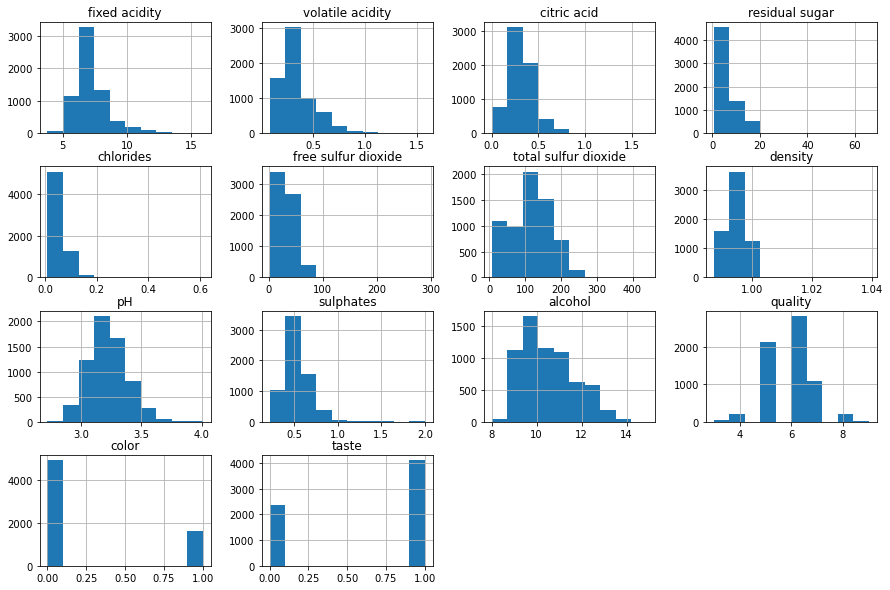

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize=(15, 10))
plt.show()

- 잘 분포되어 있는 컬럼이 좋을 때가 많다

#### quality별 다른 특성이 어떤지 확인해보자

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [9]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(colum_names, ['quality'], aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          10.15     0.0550         0.33  0.995900           7.45   
4          10.00     0.0505         0.26  0.994995           7.00   
5           9.60     0.0530         0.30  0.996100           7.10   
6          10.50     0.0460         0.31  0.994700           6.90   
7          11.40     0.0390         0.32  0.992400           6.90   
8          12.00     0.0370         0.32  0.991890           6.80   
9          12.50     0.0310         0.36  0.990300           7.10   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       17.0  3.245            3.15      0.505   
4                       15.0  3.220            2.20      0.485   
5                       27.0  3.190            3.00      0.500   
6                       29.0  3.210            3

#### quality에 대한 나머지 특징들의 상관관계

In [12]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.035807


In [13]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

#### taste 컬럼의 분포

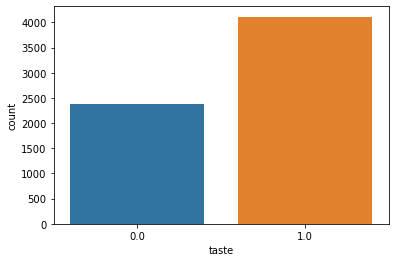

In [16]:
import seaborn as sns

sns.countplot(x=wine['taste'])
plt.show()

#### 다양한 모델을 한번에 테스트 해보자

In [3]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [2]:
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('LogisticRegression', LogisticRegression()),
 ('LGBMClassifier', LGBMClassifier())]

#### 결과를 저장하기 위한 작업

In [36]:
%time # 문장 하나 시간
a = 1

Wall time: 0 ns


In [38]:
%%time # 셀 전체 시간

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8198898719182646 0.018627967829260607
DecisionTreeClassifier 0.7542779669800843 0.01227495439531279
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
LogisticRegression 0.74273191678389 0.015548839626296565
Wall time: 6.26 s


#### cross-validation 결과를 일목요연하게 확인하기

In [41]:
results

[array([0.82211538, 0.85      , 0.79403272, 0.82483157, 0.80846968]),
 array([0.75288462, 0.77307692, 0.73917228, 0.76227141, 0.7439846 ]),
 array([0.74903846, 0.80384615, 0.72666025, 0.74687199, 0.74013474]),
 array([0.77019231, 0.80288462, 0.73820982, 0.7680462 , 0.75264678]),
 array([0.73461538, 0.77307692, 0.73435996, 0.74109721, 0.73051011])]

In [42]:
names

['RandomForestClassifier',
 'DecisionTreeClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'LogisticRegression']

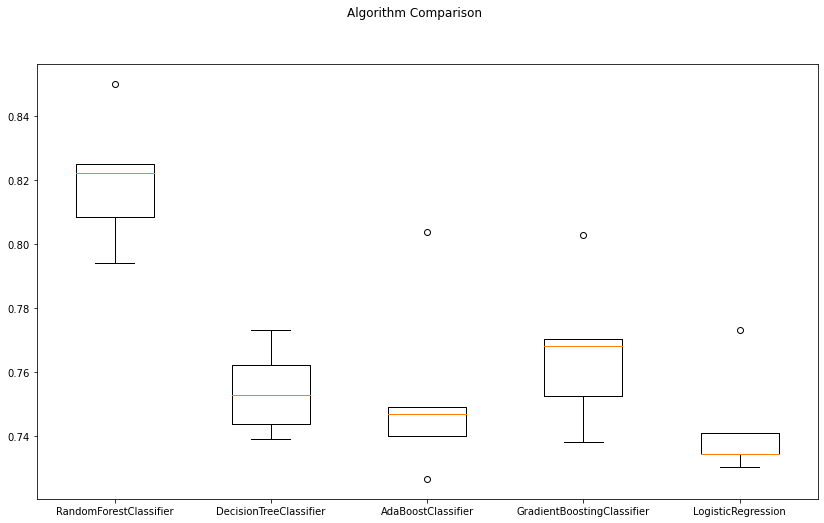

In [40]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison') # sup: subplot
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- wine데이터에 대해서는 randomForest가 가장 높은 성능 분류를 보인다

#### test데이터에 대한 평가 결과

In [43]:
%%time

from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8423076923076923
DecisionTreeClassifier 0.7769230769230769
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7469230769230769
Wall time: 1.45 s
